# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Mikhael
- **Email:** el.10012.el@gmail.com
- **ID Dicoding:** El El

## Menentukan Pertanyaan Bisnis

- Apa saja 5 produk dengan review bagus untuk direkomendasikan kepada pelanggan?
- Apa saja 5 produk dengan review jelek untuk diperbaiki/tidak dijual kembali?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# order_items_dataset
order_item = pd.read_csv("order_items_dataset.csv")
order_item = order_item[["order_id", "product_id"]]
order_item.head()

,order_id,product_id
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089


In [3]:
# order_reviews_dataset
order_reviews = pd.read_csv("order_reviews_dataset.csv")
order_reviews = order_reviews[["order_id", "review_score"]]
order_reviews.head()

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5
3,658677c97b385a9be170737859d3511b,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [4]:
# products_dataset
product = pd.read_csv("products_dataset.csv")
product = product[["product_id", "product_category_name"]]
product.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [5]:
# product_category_name_translation
product_category = pd.read_csv("product_category_name_translation.csv")
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [6]:
# Merge
# order_items_dataset & order_reviews_dataset (order_id)
new_data = pd.merge(
    left = order_item,
    right = order_reviews,
    how = "inner",
    on = "order_id"
)

# order_items_dataset & products_dataset (product_id)
new_data_1 = pd.merge(
    left = new_data,
    right = product,
    how = "inner",
    on = "product_id"
)

# products_dataset & product_category_name_translation (product_category_name)
final_data = pd.merge(
    left = new_data_1,
    right = product_category,
    how = "inner",
    on = "product_category_name"
)

# Print Data
final_data

,order_id,product_id,review_score,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,5,cool_stuff,cool_stuff
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,5,cool_stuff,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,4,cool_stuff,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,5,cool_stuff,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,5,cool_stuff,cool_stuff
...,...,...,...,...,...
110745,b99217b1fcf2fdeace7b8d869b76cb91,57bdf3098169cccdb62221bd3e089cbd,5,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
110746,bc3ac768a8963f4ca68942ea6558fc9f,57bdf3098169cccdb62221bd3e089cbd,5,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
110747,cab08f0417a702d0f4782ec02356a4ac,8cfc3506cedc0626364457d254429118,5,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
110748,cb53f0b6e8f9082a9f5a113765dd1236,8cfc3506cedc0626364457d254429118,5,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


### Assessing Data

In [7]:
# Mengetahui Data Ada Yang Kosong Atau Tidak
final_data.isna().sum()

order_id                         0
product_id                       0
review_score                     0
product_category_name            0
product_category_name_english    0
dtype: int64

In [8]:
# Mengetahui Data Yang Duplikat
print("Jumlah Data Duplikat", final_data.duplicated().sum())

Jumlah Data Duplikat 10369


### Cleaning Data

In [9]:
# Menghapus Baris Data Yang Hilang
final_data.dropna(inplace=True)
final_data.isna().sum()

order_id                         0
product_id                       0
review_score                     0
product_category_name            0
product_category_name_english    0
dtype: int64

In [10]:
# Menghapus Data Yang Duplikat
final_data.drop_duplicates(inplace=True)
print("Jumlah Data Duplikat", final_data.duplicated().sum())

Jumlah Data Duplikat 0


In [11]:
# Print Data
final_data.head()

,order_id,product_id,review_score,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,5,cool_stuff,cool_stuff
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,5,cool_stuff,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,4,cool_stuff,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,5,cool_stuff,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,5,cool_stuff,cool_stuff


## Exploratory Data Analysis (EDA)

### Explore ...

In [13]:
# Group By Score
def score_to_category(score):
    if score == 1:
        return 'Buruk'
    elif score == 2:
        return 'Jelek'
    elif score == 3:
        return 'Biasa'
    elif score == 4:
        return 'Baik'
    elif score == 5:
        return 'Bagus'
    else:
        return 'Unknown'

# Apply the function to create a new column 'score_category'
final_data['score_category'] = final_data['review_score'].apply(score_to_category)

# Display the result
final_data

,order_id,product_id,review_score,product_category_name,product_category_name_english,score_category
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,5,cool_stuff,cool_stuff,Bagus
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,5,cool_stuff,cool_stuff,Bagus
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,4,cool_stuff,cool_stuff,Baik
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,5,cool_stuff,cool_stuff,Bagus
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,5,cool_stuff,cool_stuff,Bagus
...,...,...,...,...,...,...
110745,b99217b1fcf2fdeace7b8d869b76cb91,57bdf3098169cccdb62221bd3e089cbd,5,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,Bagus
110746,bc3ac768a8963f4ca68942ea6558fc9f,57bdf3098169cccdb62221bd3e089cbd,5,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,Bagus
110747,cab08f0417a702d0f4782ec02356a4ac,8cfc3506cedc0626364457d254429118,5,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,Bagus
110748,cb53f0b6e8f9082a9f5a113765dd1236,8cfc3506cedc0626364457d254429118,5,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,Bagus


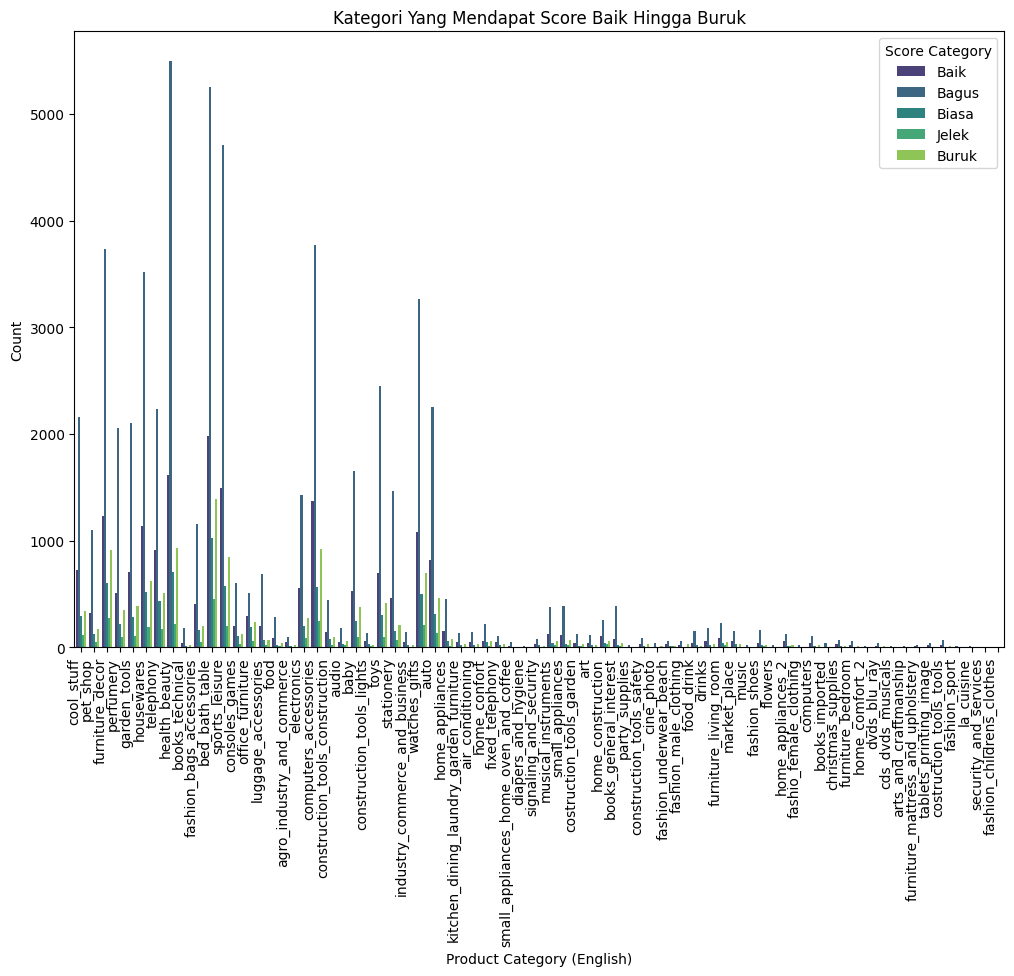

In [14]:
# Score yang Ditampilkan
score_order = ['Baik', 'Bagus', "Biasa", "Jelek", "Buruk"]

# Grup Bar Sesuai Kategori
plt.figure(figsize=(12, 8))
sns.countplot(x='product_category_name_english',
              hue='score_category',
              data=final_data,
              palette='viridis',
              order=final_data['product_category_name_english'].unique(),
              hue_order=score_order)
plt.title('Kategori Yang Mendapat Score Baik Hingga Buruk')
plt.xlabel('Product Category (English)')
plt.ylabel('Count')
plt.legend(title='Score Category')
plt.xticks(rotation=90, ha='right')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

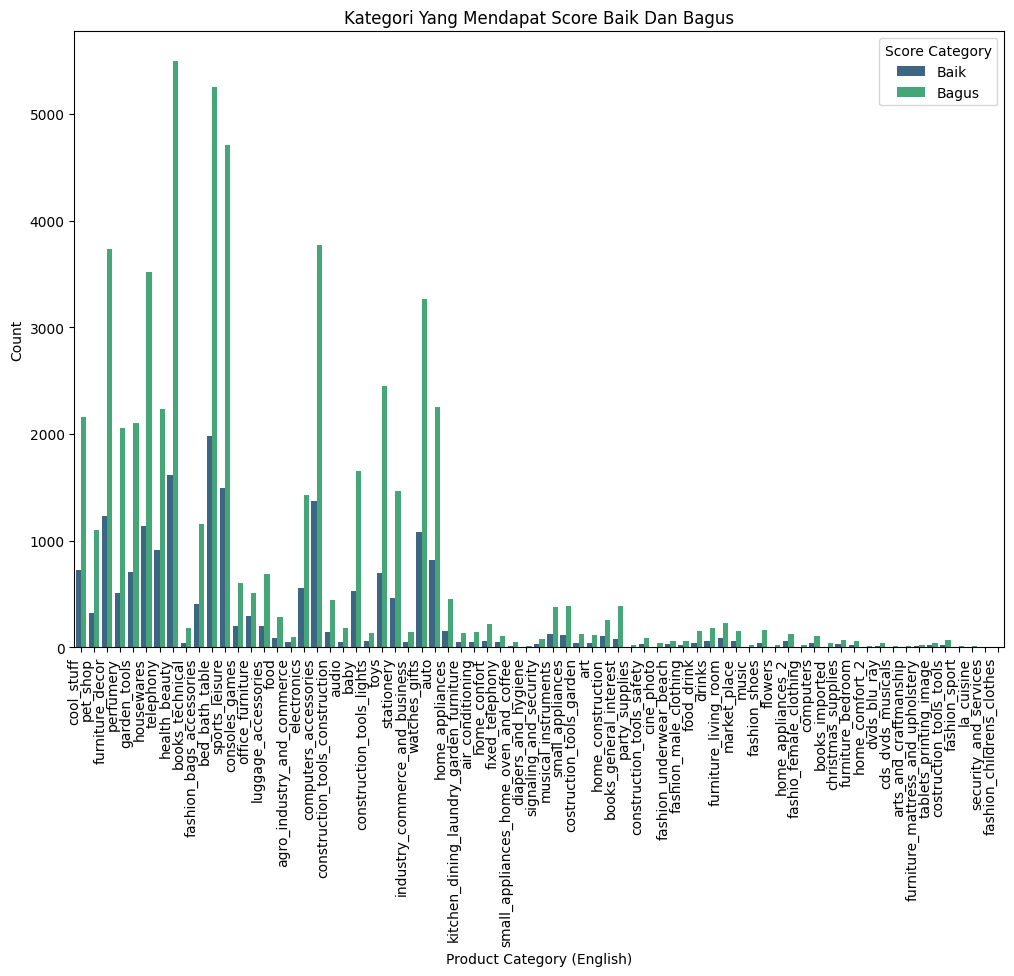

In [15]:
# Score yang Ditampilkan
score_order = ['Baik', 'Bagus']

# Grup Bar Sesuai Kategori
plt.figure(figsize=(12, 8))
sns.countplot(x='product_category_name_english',
              hue='score_category',
              data=final_data,
              palette='viridis',
              order=final_data['product_category_name_english'].unique(),
              hue_order=score_order)
plt.title('Kategori Yang Mendapat Score Baik Dan Bagus')
plt.xlabel('Product Category (English)')
plt.ylabel('Count')
plt.legend(title='Score Category')
plt.xticks(rotation=90, ha='right')
plt.show()

### Pertanyaan 2:

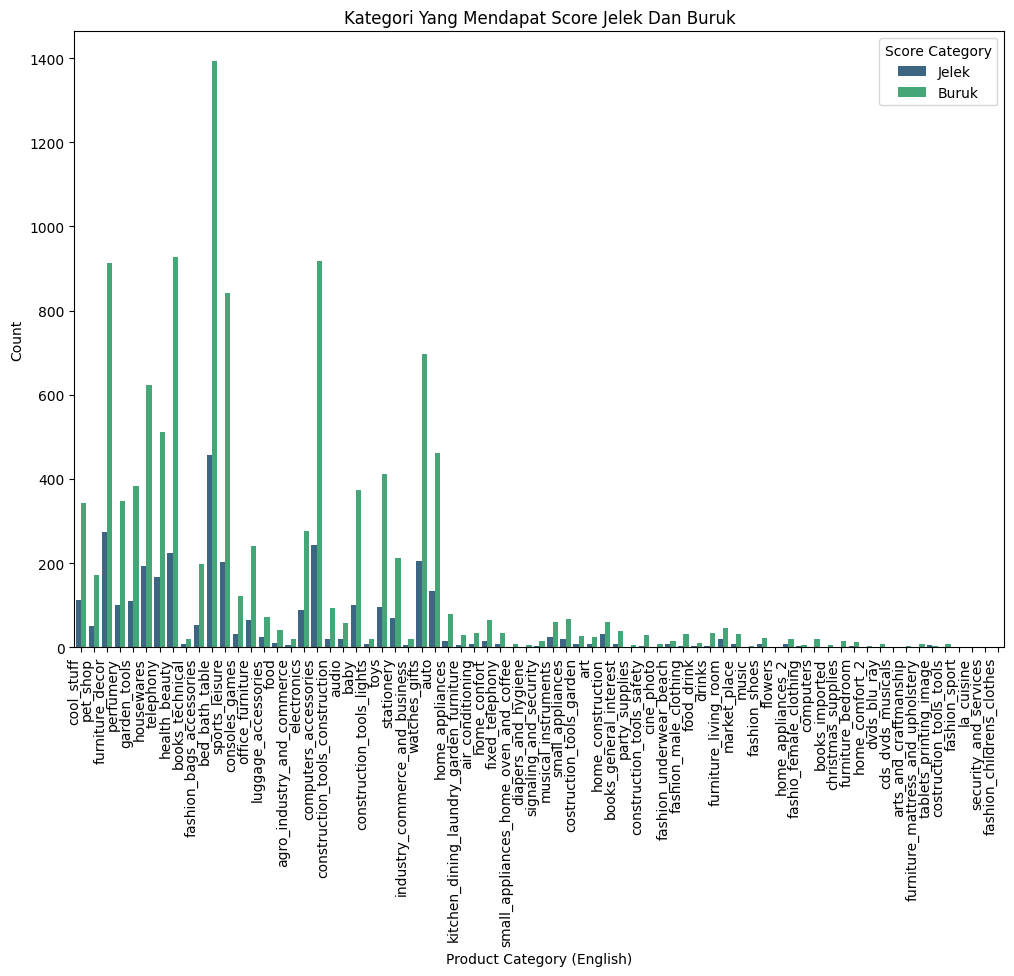

In [16]:
# Score yang Ditampilkan
score_order = ['Jelek', 'Buruk']

# Grup Bar Sesuai Kategori
plt.figure(figsize=(12, 8))
sns.countplot(x='product_category_name_english',
              hue='score_category',
              data=final_data,
              palette='viridis',
              order=final_data['product_category_name_english'].unique(),
              hue_order=score_order)
plt.title('Kategori Yang Mendapat Score Jelek Dan Buruk')
plt.xlabel('Product Category (English)')
plt.ylabel('Count')
plt.legend(title='Score Category')
plt.xticks(rotation=90, ha='right')
plt.show()

## Conclusion

- Jadi 5 produk yang akan direkomendasikan kepada pelanggan adalah


1. Health Beauty
2. Bed Bath Table
3. Sport Leisure
4. Furniture Decor
5. Computers Accessories


- Jadi 5 produk yang tidak akan dijual/dipertimbangkan kembali adalah
1. Bed Bath Table
2. Furniture Decor
3. Computers Accessories
4. Health Beauty
5. Sport Leisur

